# Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store . Using this model we also try to understand which properties of the products and stores play a key role in increasing sales.

# Hypothesis Generation 

1. Hypothesis generation based on Item Details:

    A item is an important object when it comes to predict the sale of that item. Various factor related to item is there to predict the product sales Here are a few hypothesis:
   
   a. Item_Identifier:
     
     It don't have an impact to the products sales because it identifies the product id only.
     
   b. Item_Weight:
      
      Item weight have directly connected with item sales price. Because based on the weight sales price will be varied.
      
      c. Item_Fat_Content:
      
      Based on the fat percentage item is sold accordingly.In today's day many people are health concious so high fat content product may be sale less as compare to lower fat content product.
      
      d. Item_visibility:
      
      It defines the ability for retailer to discover the products into the store.So if a item is not visible in the store so it might not be sale at all. So Item_visibility have an impact on product sales.
      
      e. Item_Type:
      
      Item_Type have direct impact in product sales.Because for different type of item sales will be different.
      
      f. Item_MRP:
      
      If the Item_MRP is high then the product sales will be less. So reasonable price of the product giving a high chance to increase the sales.
      

2. Hypothesis generation based on Outlet Details:

   An outlet is an important object when it comes to predict the sales of that item. Various factor related to outlet is there to predict the product sales Here are a few hypothesis:
   
   a. Outlet_Indentifier:
   
   It identifies the outlet not the item so that it have no effect to the sales price.
   
   b. Outlet_establishment_year:
   
   If the outlet is very old so it might happen many customer buy their product from the outlet and the sales high depending on the outlet's age.
   
   c. Outlet_size:
   
   If outlet_size is big so they can store many items in the outlet.According to that sales price also increase.
   
   d. Outlet_location_type:
   
   If the outlet is located in the high population area (such as tier 1 city) then there is a high chance in increasing the sales price. Location have an impact to the sales price.
   
   e. Outlet_type:
   
   Depending on the outlet_type sales will be different.
   

# Loading the require libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Loading the Train and Test data

In [2]:
train=pd.read_csv(r'Downloads\train_dataset.csv')
test=pd.read_csv(r'Downloads\test_dataset.csv')

In [3]:
# Train dataset

train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Test Dataset

test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Basic information about the data 

In [5]:
# Shape of the data

# for train data

print('The shape of train datset: ',train.shape)

# for test data

print('The shape of test datset: ',test.shape)

The shape of train datset:  (8523, 12)
The shape of test datset:  (5681, 11)


In [6]:
# Information about train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Description about train data

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Missing Value Treatment 

#### For train dataset: 

In [8]:
# Checking null values :

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# As you see 'Item_Weight' is an integer type so for that we fill it with median value.

train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].median())

# As you see 'Outlet_Size' is an object type so for that we fill it with mode value.

train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [10]:
# Checking null values again:

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### For test dataset:

In [11]:
# Checking null values :

test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
# As you see 'Item_Weight' is an integer type so for that we fill it with median value.

test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].median())

# As you see 'Outlet_Size' is an object type so for that we fill it with mode value.

test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [13]:
# Checking null values again:

test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Exploratory data analysis

In [14]:
# Fixed the value with Item_Fat_Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [16]:
# As you see 'Low Fat' is somewhere LF and low fat and 'Regualar' somewhere 'reg'. We have to relace it.
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

## Univariate Analysis

In [17]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

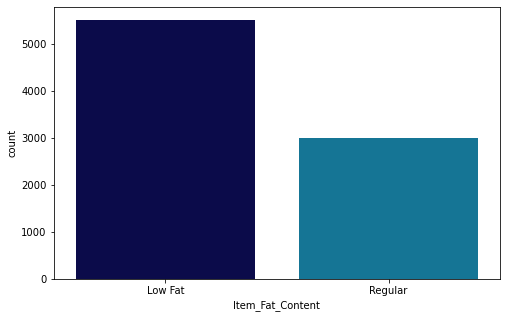

In [18]:
# Countplot for 'Item_Fat_Content'.

plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=train,palette='ocean')

Result: Number of Low Fat product is more than Regular Fat product.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

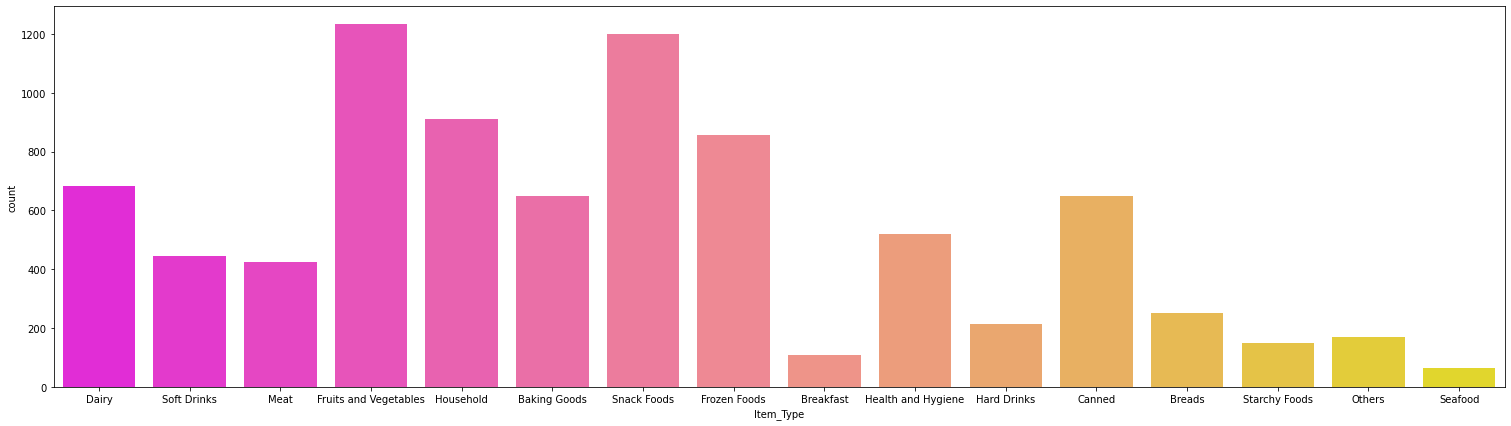

In [19]:
# countplot for 'Item_Type'

plt.figure(figsize=(26,7))
sns.countplot('Item_Type', data=train, palette='spring')

Result: 
    
1. 'Fruits and Vegetables' and 'Snack Foods' are largely sold as people tend to use them on daily purpose.
2. 'Breads' , 'seafood' sales very less number of times.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

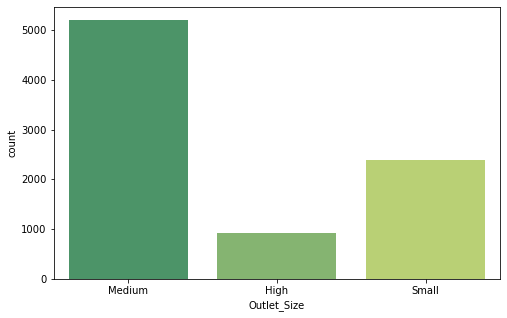

In [20]:
# countplot for 'Outlet_Size'.

plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=train, palette='summer')

Result:
    
1. Maximum number of outlets are in medium size.

2. There are very less number of outlets which are in High size.


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

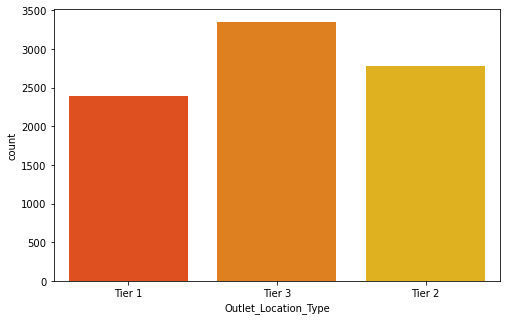

In [21]:
# countplot for 'Outlet_Location_Type'.

plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=train, palette='autumn')

Result:
    
1. Maximum Outlet_Location_type are identify 'Tier 3' city.

2. Outlet_Location_type are identify 'Tier 1' cities are very less.

# Bivariate Analysis

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

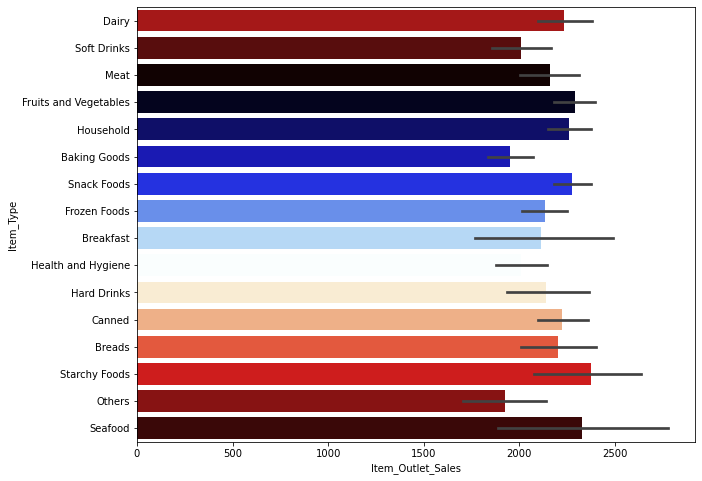

In [22]:
# barplot of 'Item_Type' and 'Item_Outlet_Sales'.

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train, palette= 'flag')

Result:
    
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

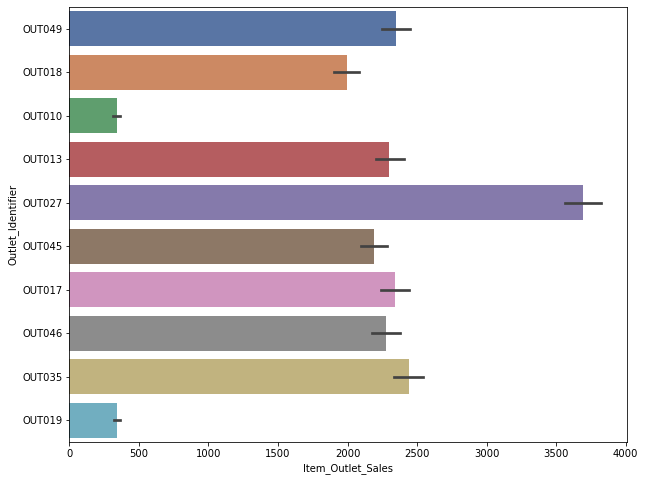

In [26]:
# barplot to showing outletwise sales.

plt.figure(figsize=(10,8))
sns.barplot(y='Outlet_Identifier', x='Item_Outlet_Sales', data=train, palette= 'deep')

Result:
    
1. Outlet 'OUT027' have maximum sales.
2. Outlet 'OUT010' and 'OUT019' sales is very low.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

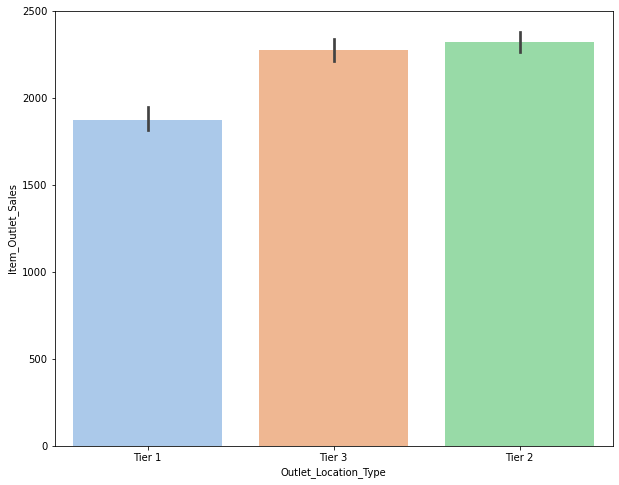

In [28]:
# Barplot to showing location wise product sales.

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Location_Type', data=train, palette= 'pastel')

Result:

Tier2 and Tier3 locations have highest sales as compare to Tier1 location.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

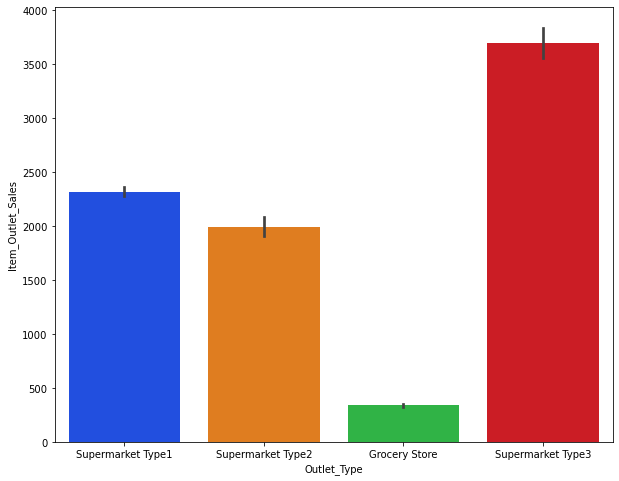

In [29]:
# Barplot showing Outlet_Type wise product sales.

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Type', data=train, palette= 'bright')

Result:
    
1. Maximum no of product sales at the outlet type 'Supermarket Type3'.
2. 'Grocery store' have very less amount of sales.

In [30]:
#  The feature 'Outlet_Establishment_Year' to convert it to 'Outlet_Age'.

from datetime import datetime,date

def age(established):
    born=established
    today=date.today()
    return today.year-born
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(age)
train=train.drop('Outlet_Establishment_Year',axis=1)

In [31]:
# Same for test data
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(age)
test=test.drop('Outlet_Establishment_Year',axis=1)

<AxesSubplot:xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

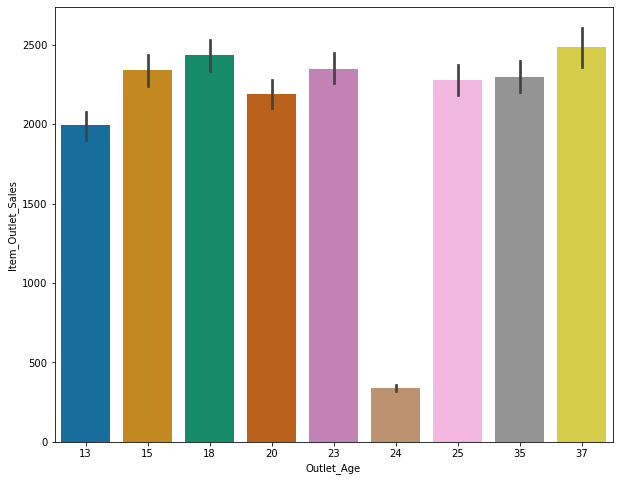

In [34]:
# Barplot to showing Outlet_Age wise sale

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Age', data=train, palette= 'colorblind')

Result:
    
As you see as the age increase sales also increasing.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

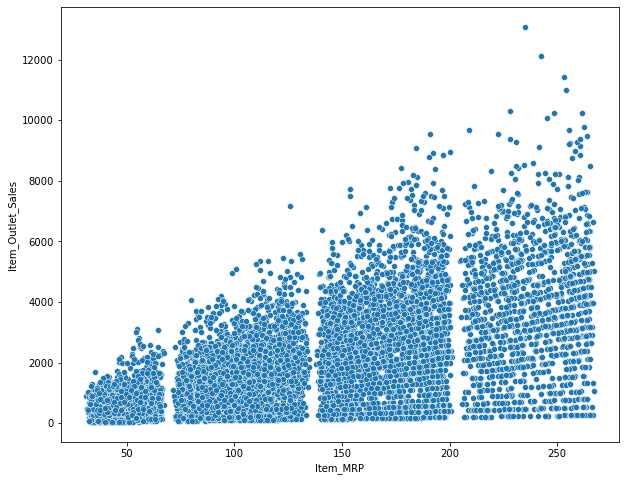

In [36]:
# Scatterplot to show the relationship between 'Item_MRP' and 'Item_Outlet_Sales'

plt.figure(figsize=(10,8))
sns.scatterplot(y='Item_Outlet_Sales', x='Item_MRP', data=train, palette= 'bright')


Result:
    
There is good amount of product sales where item mrp in between 100-200

<AxesSubplot:>

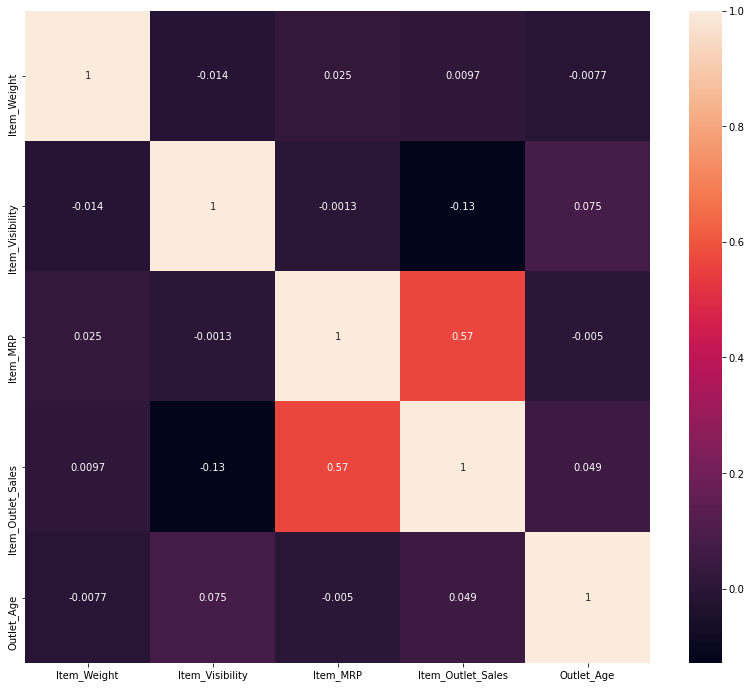

In [37]:
# Corelation matrix

plt.figure(figsize=(14,12))

sns.heatmap(train.corr(),annot=True)

# Feature Engineering 

### Encoding Categorical Variables

#### Label Encoding

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   int32  
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   int32  
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   int32  
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   int32  
 7   Outlet_Size           8523 non-null   int32  
 8   Outlet_Location_Type  8523 non-null   int32  
 9   Outlet_Type           8523 non-null   int32  
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mode = train.select_dtypes(include ='object').columns

# For Train Dataset
for i in var_mode:
    train[i] = le.fit_transform(train[i])
    
# For Test Dataset    
for i in var_mode:
    test[i] = le.fit_transform(test[i])

In [40]:
# Tarin dataset

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,23
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,13
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,23
3,1121,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,24
4,1297,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,35


In [41]:
# test dataset

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750,0,0.007565,13,107.8622,9,1,0,1,23
1,1067,8.300,1,0.038428,4,87.3198,2,1,1,1,15
2,1406,14.600,0,0.099575,11,241.7538,0,1,2,0,24
3,809,7.315,0,0.015388,13,155.0340,2,1,1,1,15
4,1184,12.500,1,0.118599,4,234.2300,5,1,2,3,37


# Model Building 

### Pre-processing of the data

In [44]:
# Drop Unnecessary columns.

# for train dataset.

train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [45]:
# for test dataset.

test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [46]:
# Separate dependent and independent variables.

# Dependent variable 
y = train['Item_Outlet_Sales']

# Indepndent variable
x = train.drop(columns = ['Item_Outlet_Sales'], axis=1)

### Spillting The dataset into Traing set and Test Set

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=22)

In [51]:
# Importing all the models through sklearn library

# Linear Regression
from sklearn.linear_model import LinearRegression 

# Regularized Linear Regression
from sklearn.linear_model import Ridge, Lasso

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Extreme Gradient Boosting Regression
import xgboost as xgb


In [53]:
algos = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(),xgb.XGBRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression','RandomForestRegressor','XGBRegressor']
rmse_list = []

#### Checking Root Mean Squared error(RMSE) of all the model:

In [56]:
from sklearn.metrics import mean_squared_error
for name in algos:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MSE =mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)  

In [58]:
# Creating dataframe of the evolution:

evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list})
evaluation

,Model,RMSE
0,Linear Regression,1220.764545
1,Ridge Regression,1220.733966
2,Lasso Regression,1220.752145
3,K Neighbors Regression,1578.628073
4,Decision Tree Regression,1327.263577
5,RandomForestRegressor,1198.067076
6,XGBRegressor,1204.631048


#### Checking R-Squared of all the model:

In [59]:
from sklearn.metrics import r2_score
r2_list=[]
for name in algos:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 =r2_score(y_test, y_pred)
    r2 = np.sqrt(r2)
    r2_list.append(r2)  

In [61]:
# Creating dataframe of the evolution:

evaluation = pd.DataFrame({'Model': names, 'r2-score': r2_list})
evaluation

,Model,r2-score
0,Linear Regression,0.708219
1,Ridge Regression,0.708237
2,Lasso Regression,0.708227
3,K Neighbors Regression,0.412445
4,Decision Tree Regression,0.640950
5,RandomForestRegressor,0.727474
6,XGBRegressor,0.717399


# Summary




1. According to RMSE value:

  a. From the RMSE evaluation dataframe the Random Forst Regressor Model have lowest RMSE value = 1198.067076. So this is best model for our dataset.

   b. K Neighbors Regression model have highest RMSE value i.e 1578.628073 so we consider this model is not fit for our dataset.
   

2. According to r2-score:

  a. RandomForestRegressor model have highest r2-score i.e 0.727474 so we can tell that this model is good fit for the dataset.

  b. K Neighbors Regression model have lowest r2-score i.e 0.412445 so we can tell that this model is badly fit for the dataset.

# Thank You